# Mini Project: Mapping Data Lifecycle in Retail Domain

Dataset Source: Kaggle (Retail Sales Dataset)

This project demonstrates how data flows through its lifecycle:
Capture → Storage → Processing → Analysis → Visualization

We use a sample retail sales dataset that contains information about customer orders, sales amount, products, and regions.

Our goal is to understand sales trends and identify business insights.

## 2. Data Storage
In companies, sales data is usually stored in:
- Databases (MySQL, PostgreSQL)
- Cloud Storage (AWS, Google Cloud)

Here, our dataset is stored in a CSV file, which acts like a simple database table.


## 3. Data Processing
Before using the data, we need to clean and prepare it:
- Handle missing values.
- Convert date columns to proper formats.
- Check for duplicate rows.


In [2]:
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.isnull().sum().head(10)

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
dtype: int64

In [4]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

df = df.dropna(subset=['CUSTOMERNAME'])

print("After cleaning:", df.shape)

After cleaning: (2823, 25)


## 4. Data Analysis
Now that the data is clean, we can look for insights.
Some common business questions are:
- Which products generate the highest sales?
- Which countries contribute the most revenue?
- What are the monthly sales trends?

### Total sales by product line(cars)

In [5]:
sales_by_product = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(
    ascending=False)
sales_by_product

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

### Total sales by country

In [6]:
sales_by_country = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False).head(10)
sales_by_country

COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64

### Monthly sales trend

In [7]:
monthly_sales = df.groupby(["YEAR_ID","MONTH_ID"])["SALES"].sum()
monthly_sales.head()

YEAR_ID  MONTH_ID
2003     1           129753.60
         2           140836.19
         3           174504.90
         4           201609.55
         5           192673.11
Name: SALES, dtype: float64

## 5. Data Visualization
Finally, insights are presented visually so managers can make decisions.

### Sales by product

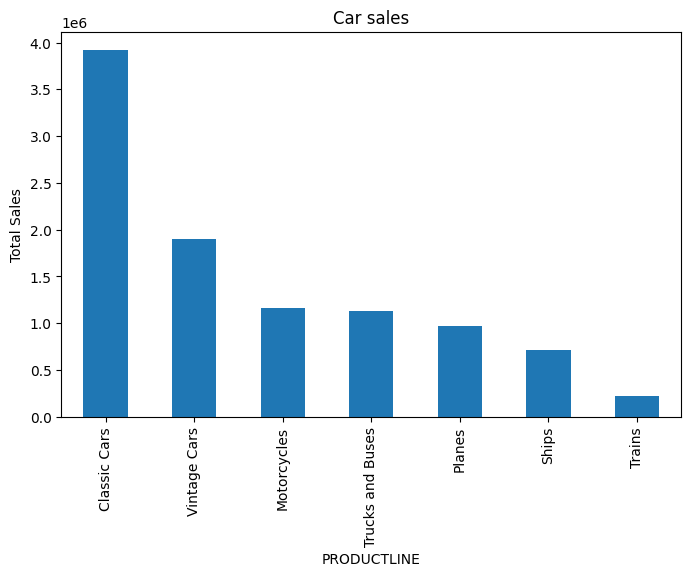

In [8]:
import matplotlib.pyplot as plt

sales_by_product.plot(kind="bar", figsize=(8,5), title="Car sales")
plt.ylabel("Total Sales")
plt.show()

### Top 10 countries sale

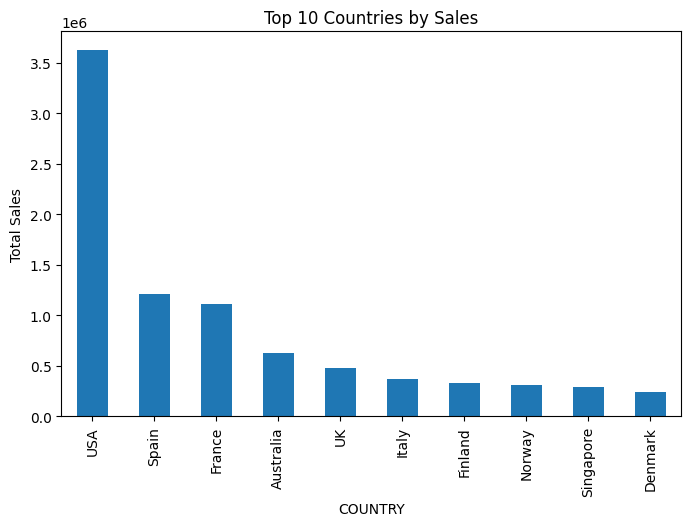

In [9]:
sales_by_country.plot(kind="bar", figsize=(8,5), title="Top 10 Countries by Sales")
plt.ylabel("Total Sales")
plt.show()

### Monthly sales trend

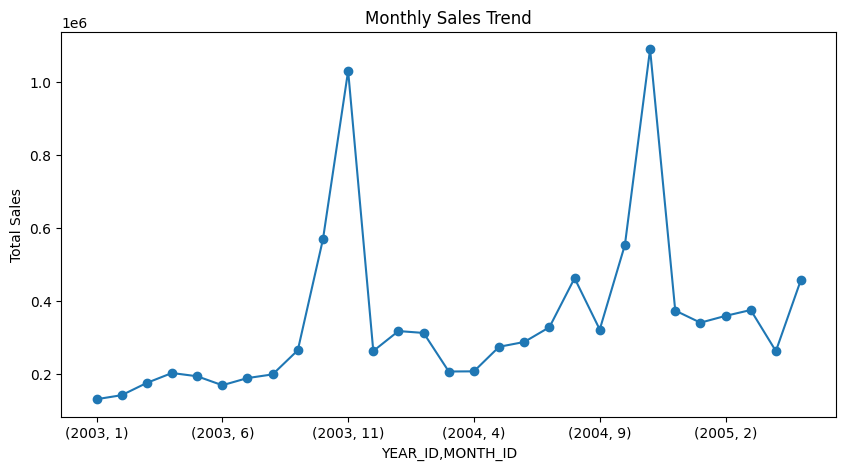

In [10]:
monthly_sales.plot(kind="line", figsize=(10,5), marker="o", title="Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()

## 6. Conclusion
We successfully mapped the data lifecycle for a retail problem:

- Capture: Sales data collected from transactions (POS, online).
- Storage: Data stored in CSV file (simulating a database).
- Processing: Cleaned missing values, converted dates.
- Analysis: Identified top products, revenue by country, and monthly trends.
- Visualization: Created charts for easy understanding.

Key Insights

- Product Line: Classic Cars generated the highest revenue of 3,919,615.66, followed by Vintage Cars with 1,903,150.84.

- Country: The USA contributed the majority of sales (3,627,982.83), followed by Spain (1,215,686.92) and France (1,110,916.52).

- Monthly Trends: Sales peaked in November (2,118,885.67), showing strong seasonality, followed by October (1,121,215.22) and May (923,972.56).
